# Mooring Synthesis of Initial NC data (offline)

## 18BS-4B

- from netcdf files
- plot all depths of each parameter on each other for comparative purposes
- Temperature, Salinity, Pressure in this notebook.  See companion for Oxygen, Chlor, ADCP/currents, etc

In [9]:
import xarray as xa
import pandas as pd
import numpy as np
import cmocean

In [10]:
#wrap the plot in image settings for visual appeal
# may be able to make this cleaner or just a preset
%run '../../settings/mpl_plot_settings.py'

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker


In [11]:
import glob
mfd = {}

for file in glob.glob('/Users/bell/ecoraid/2018/Moorings/18bs4b/final_data_cf/*mt*.nc'):
    mfd[file] = xa.open_dataset(file).load()

## Temperature (full temporal resolution)

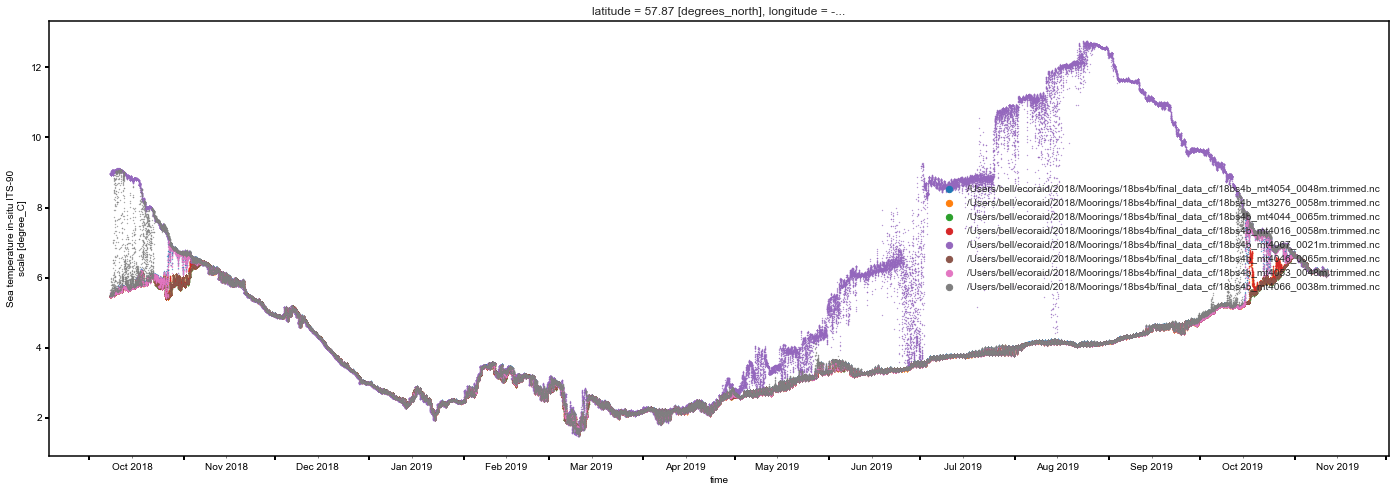

In [12]:
fig, ax = plt.subplots(1,figsize=(24, 8))
for file in mfd.items():
    try:
        file[1].isel(latitude=0,longitude=0).plot.scatter(x="time",y="temperature",s=.1,ax=ax,add_guide=False,label=file[0])
    except:
        pass

ax.legend(loc='center right',markerscale=20)
ax.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_formatter(DateFormatter('%b %Y'))
ax.xaxis.set_major_formatter(DateFormatter(''))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)

## Temperature (full temporal resolution)

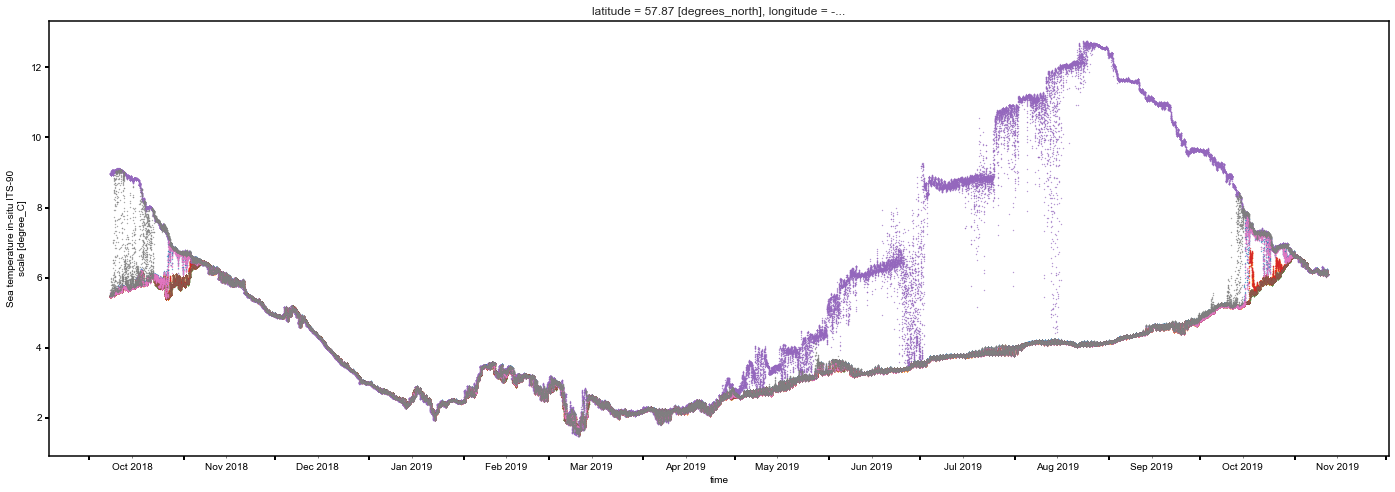

In [13]:
fig, ax = plt.subplots(1,figsize=(24, 8))
for file in mfd.items():
    try:
        file[1].isel(latitude=0,longitude=0).plot.scatter(x="time",y="temperature",s=.1,ax=ax,add_guide=False,label=file[0])
    except:
        pass

# ax.legend(loc='center right',markerscale=20)
ax.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_formatter(DateFormatter('%b %Y'))
ax.xaxis.set_major_formatter(DateFormatter(''))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)

## Post Process QC on all MTR's

2019-11-11 21:20:00 is last good point for any sensor

In [14]:
for file in mfd.items():
    file[1].sel({'time':slice('2000','2019-11-11 21:00:00')}).to_netcdf(file[0].replace('.nc','.trimmed.nc'),format="NETCDF3_CLASSIC",encoding={'time':{'units':'days since 1900-01-01'}})